## Introduction


This project examines the determinants of interest rates in the consumer credit market using data from Lending Club, a leading peer-to-peer lending platform. The dataset consists of 10,000 loan records, each representing a distinct borrower and encompassing a wide range of variables, including verified income status, debt-to-income ratios, credit utilization, employment history, loan characteristics, and credit performance metrics. The objective of this analysis is to identify the key borrower and loan attributes that influence the interest rates assigned to individual loans. Through systematic exploration of the data, this project seeks to contribute to a deeper understanding of credit risk assessment and pricing mechanisms in the context of consumer lending.

## 1. Part A: Data Preparation

### 1.1 Required Variables

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install stargazer
from stargazer.stargazer import Stargazer


In [ ]:
df = pd.read_csv("/content/loans_dataset.csv")
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


## A


In [ ]:
retained_variables = [ "interest_rate", "verified_income", "debt_to_income",
"total_credit_utilized", "total_credit_limit",
"public_record_bankrupt", "loan_purpose", "term",
"inquiries_last_12m", "issue_month", "annual_income",
"loan_amount", "grade", "emp_length", "homeownership"]

In [ ]:
clean_df = df[retained_variables]
clean_df.head()

,interest_rate,verified_income,debt_to_income,total_credit_utilized,total_credit_limit,public_record_bankrupt,loan_purpose,term,inquiries_last_12m,issue_month,annual_income,loan_amount,grade,emp_length,homeownership
0,14.07,Verified,18.01,38767,70795,0,moving,60,6,Mar-2018,90000.0,28000,C,3.0,MORTGAGE
1,12.61,Not Verified,5.04,4321,28800,1,debt_consolidation,36,1,Feb-2018,40000.0,5000,C,10.0,RENT
2,17.09,Source Verified,21.15,16000,24193,0,other,36,4,Feb-2018,40000.0,2000,D,3.0,RENT
3,6.72,Not Verified,10.16,4997,25400,0,debt_consolidation,36,0,Jan-2018,30000.0,21600,A,1.0,RENT
4,14.07,Verified,57.96,52722,69839,0,credit_card,36,7,Mar-2018,35000.0,23000,C,10.0,RENT


## B

In [ ]:
clean_df= clean_df.rename(columns={"inquiries_last_12m": "credit_checks"})
clean_df.head()

,interest_rate,verified_income,debt_to_income,total_credit_utilized,total_credit_limit,public_record_bankrupt,loan_purpose,term,credit_checks,issue_month,annual_income,loan_amount,grade,emp_length,homeownership
0,14.07,Verified,18.01,38767,70795,0,moving,60,6,Mar-2018,90000.0,28000,C,3.0,MORTGAGE
1,12.61,Not Verified,5.04,4321,28800,1,debt_consolidation,36,1,Feb-2018,40000.0,5000,C,10.0,RENT
2,17.09,Source Verified,21.15,16000,24193,0,other,36,4,Feb-2018,40000.0,2000,D,3.0,RENT
3,6.72,Not Verified,10.16,4997,25400,0,debt_consolidation,36,0,Jan-2018,30000.0,21600,A,1.0,RENT
4,14.07,Verified,57.96,52722,69839,0,credit_card,36,7,Mar-2018,35000.0,23000,C,10.0,RENT


## C

In [ ]:
print(f"Number of observations before cleaning: {df.shape[0]}")


Number of observations before cleaning: 10000


In [ ]:
print(f"Number of observations after cleaning: {clean_df.shape[0]}")

Number of observations after cleaning: 10000


In [ ]:
print("Summary statistics of cleaned data:")
print(clean_df.describe().round(2))

Summary statistics of cleaned data:
       interest_rate  debt_to_income  total_credit_utilized  \
count       10000.00         9976.00               10000.00   
mean           12.43           19.31               51049.06   
std             5.00           15.00               53636.73   
min             5.31            0.00                   0.00   
25%             9.43           11.06               19185.50   
50%            11.98           17.57               36927.00   
75%            15.05           25.00               65421.00   
max            30.94          469.09              942456.00   

       total_credit_limit  public_record_bankrupt      term  credit_checks  \
count            10000.00                10000.00  10000.00       10000.00   
mean            183606.23                    0.12     43.27           1.96   
std             187632.71                    0.34     11.03           2.38   
min                  0.00                    0.00     36.00           0.00   
25%   

In [ ]:
# Generate summary statistics and save to CSV
summary_stats = clean_df.describe().round(2)
summary_stats.to_csv('summary_statistics.csv')

print("Summary statistics saved to 'summary_statistics.csv'")


Summary statistics saved to 'summary_statistics.csv'


## 2. PART B: Exploratory Data Analysis

### 2.1 Descriptive statistics.

## A

In [ ]:
# calculate mean, median, standard deviation, minimum and maximum for interest_rate
var_stats = ["interest_rate","annual_income", "debt_to_income", "loan_amount"]
describe_stats = pd.DataFrame({ "Mean": clean_df[var_stats].mean(),
                                "Median": clean_df[var_stats].median(),
                                "Standard deviation": clean_df[var_stats].std(),
                                "Minimum": clean_df[var_stats].min(),
                                "Maximum": clean_df[var_stats].max()
                                })

In [ ]:
print("Descriptive statistics for interest_rate:")
print(describe_stats.round(2))

Descriptive statistics for interest_rate:
                    Mean    Median  Standard deviation  Minimum     Maximum
interest_rate      12.43     11.98                5.00     5.31       30.94
annual_income   79222.15  65000.00            64734.29     0.00  2300000.00
debt_to_income     19.31     17.57               15.00     0.00      469.09
loan_amount     16361.92  14500.00            10301.96  1000.00    40000.00


## B

In [ ]:
# Unique Values and Frequencies for grade, verified_income and homeownership
grade_counts = clean_df["grade"].value_counts()
verified_income_counts = clean_df["verified_income"].value_counts()
homeownership_counts = clean_df["homeownership"].value_counts()

In [ ]:
grade_counts = clean_df['grade'].value_counts().sort_index()
print(f"Unique values and frequencies for grade are as follows:\n{grade_counts}")

Unique values and frequencies for grade are as follows:
grade
A    2459
B    3037
C    2653
D    1446
E     335
F      58
G      12
Name: count, dtype: int64


In [ ]:
print (f"Unique values and frequencies for verified_income is as follows: {verified_income_counts}")

Unique values and frequencies for verified_income is as follows: verified_income
Source Verified    4116
Not Verified       3594
Verified           2290
Name: count, dtype: int64


In [ ]:
print (f"Unique values and frequencies for homeownership is as follows: {homeownership_counts}")

Unique values and frequencies for homeownership is as follows: homeownership
MORTGAGE    4789
RENT        3858
OWN         1353
Name: count, dtype: int64


## 2.2 Data Visualizations

### a. Histograms

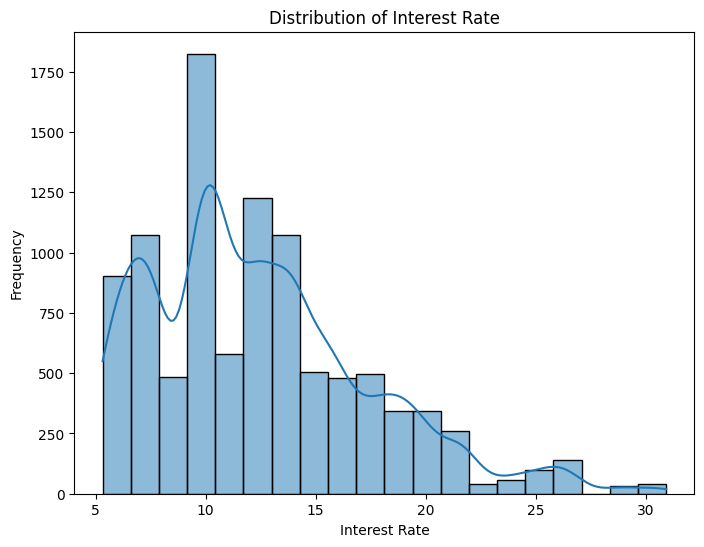

In [ ]:
# Create a histogram for the distribution of interest rate
plt.figure(figsize=(8, 6))
sns.histplot(clean_df["interest_rate"], bins=20, kde=True)
plt.xlabel("Interest Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Interest Rate")
plt.show()



Text(0.5, 1.0, 'Distribution of Annual Income')

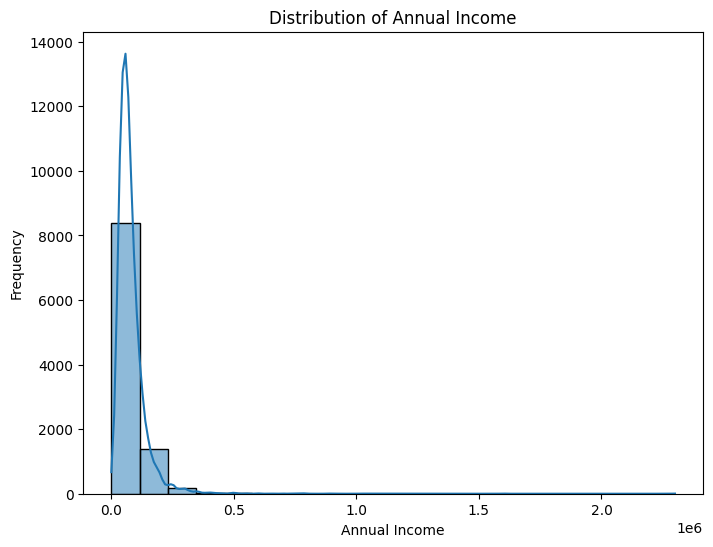

In [ ]:
# Create a histogram for the distribution of annual income
plt.figure(figsize=(8, 6))
sns.histplot(clean_df["annual_income"], bins=20, kde=True)
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.title("Distribution of Annual Income")

## b. Scatterplots


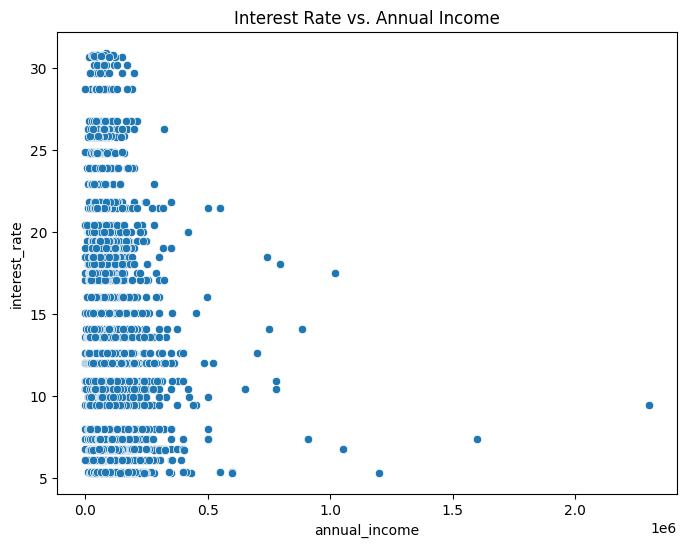

In [ ]:
# Scatterplot for interest rate and annual income
plt.figure(figsize=(8, 6))
sns.scatterplot(data=clean_df, x="annual_income", y="interest_rate")
plt.title("Interest Rate vs. Annual Income")
plt.show()

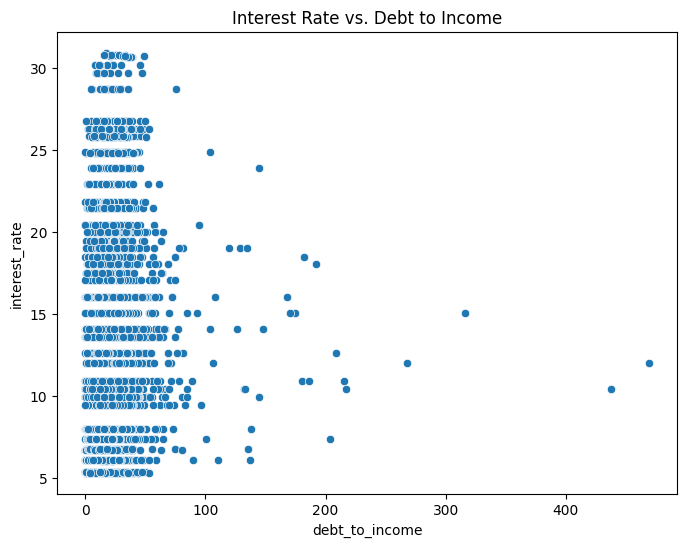

In [ ]:
# Scatterplot for interest rate and debt_to _income
plt.figure(figsize=(8, 6))
sns.scatterplot(data=clean_df, x="debt_to_income", y="interest_rate")
plt.title("Interest Rate vs. Debt to Income")
plt.show()


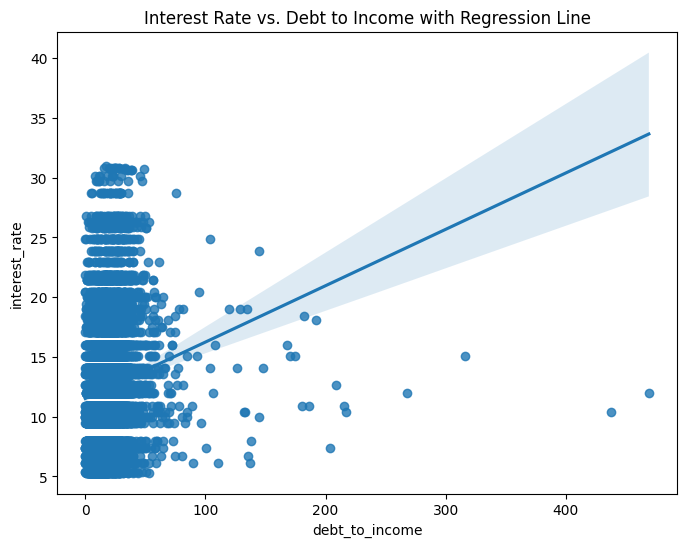

In [ ]:
# Scatterplot of interest rate and debt to income with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=clean_df, x="debt_to_income", y="interest_rate")
plt.title("Interest Rate vs. Debt to Income with Regression Line")
plt.show()

## c. Box plots

<Axes: xlabel='grade', ylabel='interest_rate'>

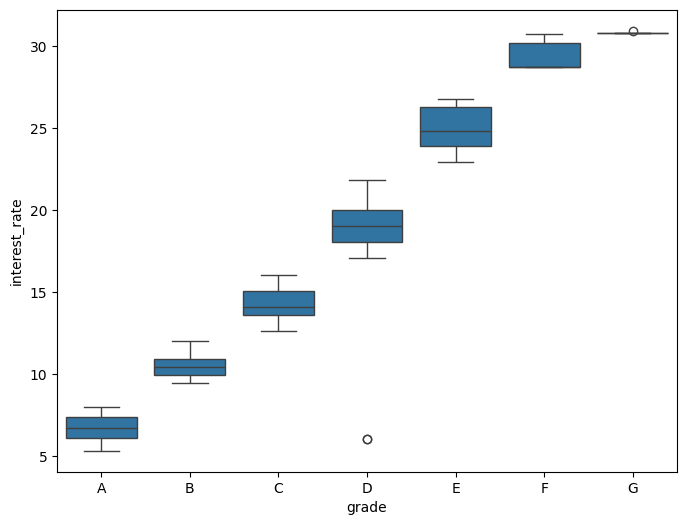

In [ ]:
# create a boxplot for interest rate by grade in aplhabetical order
plt.figure(figsize=(8, 6))
sns.boxplot(data=clean_df, x="grade", y="interest_rate", order=sorted(clean_df["grade"].unique()))

<Axes: xlabel='verified_income', ylabel='interest_rate'>

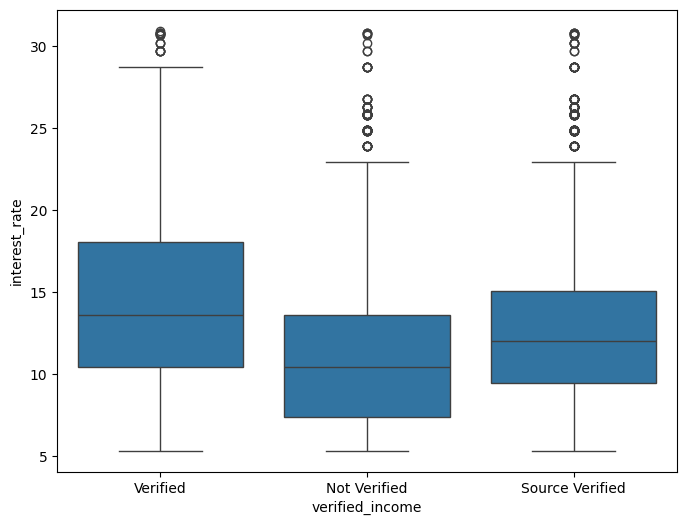

In [ ]:
#create a boxplot for interest rate by verified income
plt.figure(figsize=(8, 6))
sns.boxplot(data=clean_df, x="verified_income", y="interest_rate")

<Axes: xlabel='homeownership', ylabel='interest_rate'>

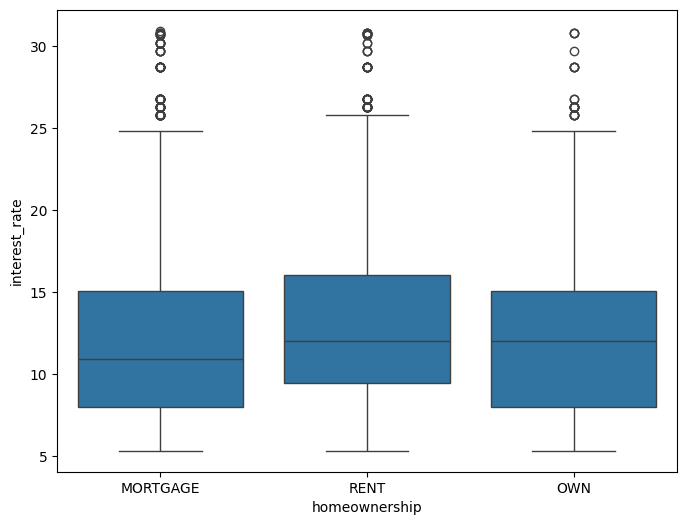

In [ ]:
#create a boxplot for interest rate by homeownership.
plt.figure(figsize=(8, 6))
sns.boxplot(data=clean_df, x="homeownership", y="interest_rate")

## 2.3 Derived Variables.


#### a. credit util = total credit utilized / total credit limit
Set to 0 if total credit limit is 0

In [ ]:
clean_df['credit_util'] = np.where(clean_df['total_credit_limit'] == 0,0,clean_df['total_credit_utilized'] / clean_df['total_credit_limit'])
clean_df['credit_util'].head()

,credit_util
0,0.547595
1,0.150035
2,0.661348
3,0.196732
4,0.754908


In [ ]:
print("\nMean of credit util:", clean_df['credit_util'].mean())
print("Proportion of non-zero credit util:", (clean_df['credit_util'] != 0).mean())


Mean of credit util: 0.40307696513838126
Proportion of non-zero credit util: 0.9972


#### b. bankruptcy dummy

In [ ]:
clean_df['bankruptcy_dummy'] = np.where(clean_df['public_record_bankrupt'] >= 1,1,0)
clean_df['bankruptcy_dummy'].head()

,bankruptcy_dummy
0,0
1,1
2,0
3,0
4,0


In [ ]:
print("\nMean of bankruptcy dummy:", (clean_df['bankruptcy_dummy'].mean()))
print("Proportion of bankruptcies:", (clean_df['bankruptcy_dummy'] == 1).mean())


Mean of bankruptcy dummy: 0.1215
Proportion of bankruptcies: 0.1215


# 3. Regeression Analysis


### Part B: Regression Analysis

#### 3.1 Models

##### (a) Model 1: Simple Linear Regression

• Estimate:
interest rate = β0 + β1 debt to income + ε

• Report regression equation with estimated coefficients

• Interpret the coefficient β1 in the model

• Test H0 : β1 = 0 at α = 0.01, 0.05, 0.1 significance levels

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
model1 = smf.ols('interest_rate ~ debt_to_income', data=clean_df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     204.2
Date:                Thu, 22 May 2025   Prob (F-statistic):           7.05e-46
Time:                        15:04:17   Log-Likelihood:                -30105.
No. Observations:                9976   AIC:                         6.021e+04
Df Residuals:                    9974   BIC:                         6.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.5114      0.081    142.

In [ ]:
# create a regression table for model1
table1 = Stargazer([model1])
table1.rename_covariates({"Intercept": "Constant"})
table1.custom_columns(["Homoskedastic SE"],[1])
table1

In [ ]:
html = table1.render_html()
with open("my_regression_table.html", "w") as f:
     f.write(html)

#open('lin_reg.html','w').write(table.render_html())

### b. Model 2: Simple Linear Regression.
 ### Estimate:
###interest rate = β0 + β1 bankruptcy dummy + ε
###• Interpret the coefficient β1 in the model
###• Test H0 : β1 = 0 at α = 0.01, 0.05, 0.1 significance levels

In [ ]:
# create bankruptcy_dummy
clean_df['bankruptcy_dummy'] = np.where(clean_df['public_record_bankrupt'] >= 1,1,0)

In [ ]:
model2 = smf.ols('interest_rate ~ bankruptcy_dummy', data=clean_df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     23.22
Date:                Thu, 22 May 2025   Prob (F-statistic):           1.47e-06
Time:                        15:04:17   Log-Likelihood:                -30274.
No. Observations:               10000   AIC:                         6.055e+04
Df Residuals:                    9998   BIC:                         6.057e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           12.3380      0.053  

In [ ]:
# create a regression table for model2
table2 = Stargazer([model2])
table2.rename_covariates({"Intercept": "Constant"})
table2.custom_columns(["Homoskedastic SE"],[1])
table2

In [ ]:
html = table2.render_html()
with open("my_regression_table.html", "w") as f:
     f.write(html)

#open('lin_reg.html','w').write(table.render_html())

### c. Multiple Linear Regression.
###Create dummy variables for verified income (specify reference category)
###• Estimate:
###interest rate = β0 + β1D1 + β2D2 + ε
###where D1, D2 are dummy variables for verif ied income
###• Compute the average interest rate for borrowers whose income source and amount are both unverified
###• Interpret coefficients

In [ ]:
# check unique variables for verified income
clean_df['verified_income'].unique()

array(['Verified', 'Not Verified', 'Source Verified'], dtype=object)

In [ ]:
model3 = smf.ols('interest_rate ~ C(verified_income, Treatment(reference="Not Verified"))', data=clean_df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     315.9
Date:                Thu, 22 May 2025   Prob (F-statistic):          8.92e-134
Time:                        15:04:17   Log-Likelihood:                -29979.
No. Observations:               10000   AIC:                         5.996e+04
Df Residuals:                    9997   BIC:                         5.999e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [ ]:
# create a regression table for model3
table3 = Stargazer([model3])
table3.rename_covariates({"Intercept": "Constant"})
table3.custom_columns(["Homoskedastic SE"],[1])
table3

In [ ]:
html = table3.render_html()
with open("my_regression_table.html", "w") as f:
     f.write(html)

#open('lin_reg.html','w').write(table.render_html())

### d. Multiple Linear Regression.
###Estimate:
###interest rate = β0 + β1 debt to income + β2 credit util + β3 bankruptcy dummy + ε
###• Compare with Model 1 and Model 2 results.
###• Interpret coefficients

In [ ]:
# create credit_util
clean_df['credit_util'] = np.where(clean_df['total_credit_limit'] == 0,0,clean_df['total_credit_utilized'] / clean_df['total_credit_limit'])

In [ ]:
model4 = smf.ols('interest_rate ~ debt_to_income + credit_util + bankruptcy_dummy', data=clean_df).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     279.9
Date:                Thu, 22 May 2025   Prob (F-statistic):          1.85e-174
Time:                        15:04:17   Log-Likelihood:                -29803.
No. Observations:                9976   AIC:                         5.961e+04
Df Residuals:                    9972   BIC:                         5.964e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.8708      0.102  

In [ ]:
# create a regression table for model 4
table4 = Stargazer([model4])
table4.rename_covariates({"Intercept": "Constant"})
table4.custom_columns(["Homoskedastic SE"],[1])
table4

In [ ]:
html = table4.render_html()
with open("my_regression_table.html", "w") as f:
     f.write(html)

#open('lin_reg.html','w').write(table.render_html())

In [ ]:
# create a table for model 1, model 2 and model 4.

table = Stargazer([model1, model2, model4])
table.rename_covariates({"Intercept": "Constant"})
table.custom_columns(["Model 1", "Model 2", "Model 3"], [1, 1, 1])
table

In [ ]:
html = table.render_html()
with open("my_regression_table.html", "w") as f:
     f.write(html)

#open('lin_reg.html','w').write(table.render_html())

### e. Enhanced Multiple Linear Regression.
###• Add these variables to Model 4:
###annual income, loan amount, term, grade, emp length, homeownership, loan purpose, credit checks
###• Create appropriate dummy variables (k − 1 for k categories)
###• State reference categories
###• Use term as dummy variable
###• Compute and report the residuals for the first five observations

In [ ]:
clean_df['credit_util'] = clean_df['total_credit_utilized'] / clean_df['total_credit_limit'].replace(0, 1)
clean_df['bankruptcy_dummy'] = (clean_df['public_record_bankrupt'] >= 1).astype(int)


In [ ]:
cat_vars = ['term', 'grade', 'homeownership', 'loan_purpose']
df_model5 = pd.get_dummies(clean_df, columns=cat_vars, drop_first=True)

In [ ]:
predictors = [
    'debt_to_income', 'credit_util', 'bankruptcy_dummy',
    'annual_income', 'loan_amount', 'emp_length', 'credit_checks'
]

In [ ]:
dummy_cols = [col for col in df_model5.columns if any(prefix in col for prefix in ['term_', 'grade_', 'homeownership_', 'loan_purpose_'])]
X_cols = predictors + dummy_cols

In [ ]:
df_model5_clean = df_model5.dropna(subset=X_cols + ['interest_rate'])

In [ ]:
X = sm.add_constant(df_model5_clean[X_cols].astype(float))
y = df_model5_clean['interest_rate'].astype(float)

In [ ]:
model5 = sm.OLS(y, X).fit()

In [ ]:
print(model5.summary())
print("\nFirst 5 residuals:")
print(model5.resid[:5])

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     6723.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        15:04:17   Log-Likelihood:                -13874.
No. Observations:                9182   AIC:                         2.780e+04
Df Residuals:                    9154   BIC:                         2.800e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [ ]:
# create a regression table for model 5
table5 = Stargazer([model5])
table5.rename_covariates({"Intercept": "Constant"})
table5.custom_columns(["Homoskedastic SE"], [1])
table5


In [ ]:
html = table5.render_html()
with open("my_regression_table.html", "w") as f:
     f.write(html)

#open('lin_reg.html','w').write(table.render_html())

In [ ]:
# predicted values from Model 5
predicted = model5.predict()

# residuals
residuals = model5.resid

# print the first 5 residuals
print("First 5 residuals (actual - predicted):")
print(residuals.head().round(2))


First 5 residuals (actual - predicted):
0   -0.27
1   -1.42
2   -2.08
3    0.02
4   -0.34
dtype: float64


### 3.2. Result Presentation.
###Present all regression results in one table:
###• Columns for Models 1-5
###• Coefficients with standard errors in parentheses
###• Significance levels: * p < 0.1, ** p < 0.05, *** p < 0.01
###• R2, number of observations, F-statistics• R2, number of observations, F -statistics



In [ ]:
# create table6
table6 = Stargazer([model1, model2, model3, model4, model5])
table6.rename_covariates({"Intercept": "Constant"})
table6.custom_columns(["Homoskedastic SE"], [5])

In [ ]:
html_table = table6.render_html()

from IPython.core.display import display, HTML
display(HTML(html_table))

with open("regression_table6.html", "w") as f:
    f.write(html_table)